In [ ]:
import networkx as nx
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.patches as patches
import matplotlib.font_manager
from scipy.stats import pearsonr
from scipy.stats import linregress
from matplotlib import pyplot as plt
import matplotlib as mpl
from pycirclize import Circos

In [ ]:
matplotlib.font_manager.fontManager.addfont('/h/tianyi/TS_datasets_reversion/Cell_Press_plot/Arial.ttf')
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
plt.rcParams['font.family'] = 'Arial'
mpl.rcParams['font.size'] = 8 
plt.rcParams['axes.linewidth'] = 0.5
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['axes.titlecolor'] = 'black'
plt.rcParams['legend.labelcolor'] = 'black'
plt.rcParams['axes.linewidth'] = 0.5

# Figure1A

## donor number

In [ ]:
primary_mut_circos=pd.read_csv('/h/tianyi/TS_datasets_reversion/sci_paper_plot_stas/data_statistic/donor_number_circos/primary_mut_circos_cancertype_color_v3.txt',sep='\t')
tissue_color=primary_mut_circos[['tissue','tissue_name'	,'tissue_cor_v2']].drop_duplicates()
tissue_name_rank=pd.DataFrame(primary_mut_circos['tissue_name'].value_counts())
tissue_name_rank['tissue_name']=tissue_name_rank.index.tolist()
tissue_name_rank.reset_index(drop=True,inplace=True)
tissue_sectors_df = primary_mut_circos[['tissue_name','tissue_cor_v2']].drop_duplicates()
tissue_sectors=tissue_sectors_df.set_index('tissue_name')['tissue_cor_v2'].to_dict()
tissue_count=pd.DataFrame(primary_mut_circos.value_counts('tissue_name'))
tissue_count.columns=['donor_size']
tissue_count['tissue_name']=tissue_count.index.tolist()
tissue_count.reset_index(drop=True,inplace=True)
tissue_count['Rank']=pd.Categorical(tissue_count['tissue_name'], categories=tissue_name_rank['tissue_name'].tolist(), ordered=True)
tissue_count = tissue_count.sort_values('Rank')
tissue_sectors=tissue_count.set_index('tissue_name')['donor_size'].to_dict()

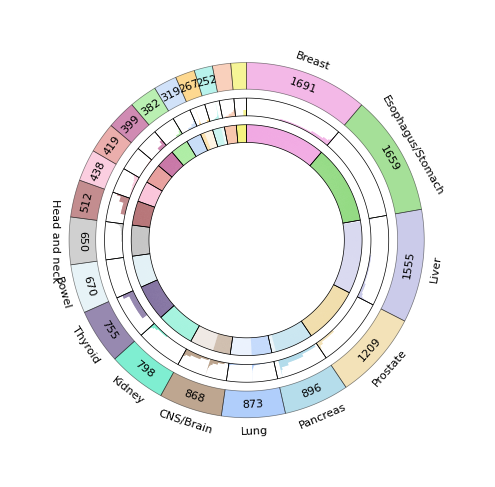

In [3]:
circos = Circos(tissue_sectors, space=0)
for sector in circos.sectors:
    tissue_eg=sector.name
    tissue_data_eg=primary_mut_circos[primary_mut_circos['tissue_name']==tissue_eg]
    tissue_color_eg=''.join(tissue_data_eg['tissue_cor_v2'].drop_duplicates())
    # Plot sector axis & name text
    if (sector.name=='Ovary/Fallopian tube') | (sector.name=='Bladder/Urinary tract') |(sector.name=='Uterus') |(sector.name=='Myeloid') |(sector.name=='Lymphoid')|(sector.name=='Biliary tract')|(sector.name=='Adrenal gland')|(sector.name=='Skin')|(sector.name=='Cervix')|(sector.name=='Bone') :
        sector.text("", size=8)
    else:
        sector.text(f"{sector.name}", size=8)
    track1 = sector.add_track((85, 100))  
    track1.axis(alpha=0.5,fc=tissue_color_eg) 
    if (sector.size==251) | (sector.size==216):
        track1.text("", size=8)
    else:
        track1.text(f"{sector.size}", size=8)
    x_all = np.arange(0, int(sector.size), 1)
    y_driver = tissue_data_eg['driver_mut_count'].tolist()
    bar_track_driver = sector.add_track((70, 80))
    bar_track_driver.axis()
    bar_track_driver.bar(x_all, y_driver,width=0.8,color=tissue_color_eg)
    y_tissue = [1]*len(x_all)
    bar_track_tissue = sector.add_track((55, 65))
    bar_track_tissue.axis()
    bar_track_tissue.bar(x_all, y_tissue,width=1,color=tissue_data_eg['cancer_color_func_output'])

fig = circos.plotfig(figsize=(8.5/2, 8.5/2))

## Figure1C

In [ ]:
#######plot WGS and WES##########
project_tissue_count_data=pd.read_csv('/h/tianyi/TS_datasets_reversion/sci_paper_plot_stas/data_statistic/donor_number_circos/project_plot_data.txt',sep='\t')
fig, axes = plt.subplots(1,1,figsize=(3.5,1.1))
plt.rcParams['axes.linewidth'] = 0.5
sns.barplot(data=project_tissue_count_data,x='count',y='projectnology',hue='tissue',palette=project_tissue_count_data['color'],ax=axes)
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylabel('Sample sizes',fontsize=8, fontname='Arial')
axes.set_yticklabels(project_tissue_count_data['projectnology'].drop_duplicates(),fontsize=8, fontname='Arial')
axes.set_xlabel('',fontsize=8, fontname='Arial')
axes.set_ylabel('',fontsize=8, fontname='Arial')
axes.legend_.remove()
plt.savefig('/h/tianyi/TS_datasets_reversion/sci_paper_plot_stas/data_statistic/donor_number_circos/project_sample_size.pdf',dpi=300,bbox_inches='tight')

tech_tissue_count_data=pd.read_csv('/h/tianyi/TS_datasets_reversion/sci_paper_plot_stas/data_statistic/donor_number_circos/technology_plot_data.txt',sep='\t')
fig, axes = plt.subplots(1,1,figsize=(3.5,1.1))
plt.rcParams['axes.linewidth'] = 0.5
sns.barplot(data=tech_tissue_count_data,x='count',y='technology',hue='tissue',palette=tech_tissue_count_data['color'],ax=axes)
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_yticklabels(tech_tissue_count_data['technology'].drop_duplicates(),fontsize=8, fontname='Arial')
axes.set_xlabel('',fontsize=8, fontname='Arial')
axes.set_ylabel('',fontsize=8, fontname='Arial')
axes.legend_.remove()
axes.tick_params(axis='x', width=0.5)
axes.tick_params(axis='y', width=0.5)
plt.savefig('/h/tianyi/TS_datasets_reversion/sci_paper_plot_stas/data_statistic/donor_number_circos/tech_sample_size_v2.pdf',dpi=300,bbox_inches='tight')

In [ ]:
## Figure1B

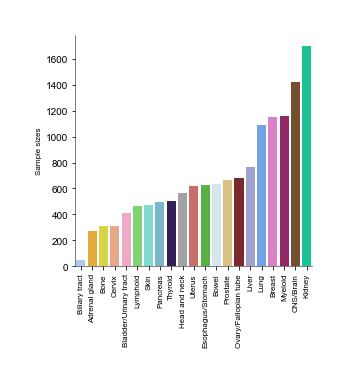

In [67]:
## expression donor number
primary_exp_donor_color_sort=pd.read_csv('/h/tianyi/TS_datasets_reversion/sci_paper_plot_stas/data_statistic/donor_number_circos/primary_exp_donor_color_data.txt',sep='\t')
fig, axes = plt.subplots(1,1,figsize=(8.5/2,8.5/2))
plt.rcParams['axes.linewidth'] = 0.5
sns.barplot(data=primary_exp_donor_color_sort,x='tissue_name',y='sample_sizes',palette=primary_exp_donor_color_sort['tissue_cor_v2'],ax=axes)
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylabel('Sample sizes',fontsize=8, fontname='Arial')
axes.set_xticklabels(primary_exp_donor_color_sort['tissue_name'],fontsize=8, fontname='Arial')
axes.set_xlabel('',fontsize=8, fontname='Arial')
axes.tick_params(labelrotation=90,axis='x')
plt.savefig('/h/tianyi/TS_datasets_reversion/sci_paper_plot_stas/data_statistic/donor_number_circos/exp/primary_exp_donor.pdf',dpi=300,bbox_inches='tight')